In [82]:
#Importing and loading the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets,transforms
from torch import nn,optim
from time import time

In [83]:
#chcking for system and version of PyTorch
import sys
print(sys.executable)
print(torch.__version__)

C:\Users\Avi\Anaconda3\python.exe
1.0.1


In [84]:
#transformation to be applied on images
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
transform

In [85]:
#defining the training and test data
train = datasets.MNIST('./data',download=True, train = True, transform=transform)
test = datasets.MNIST('./data',download=True, train =False, transform =transform)

In [86]:
#defining trainloader and testloader
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle =True)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle =True)

In [87]:
#shape of training and test datasets
data_train = iter(trainloader)
data_test = iter(testloader)
images,labels = data_train.next()
images1, labels1 = data_test.next()

print("Shape of Images in training data",images.shape)
print("Shape of lables in trianing data" ,labels.shape)
print("Shape of Images in testing data",images1.shape)
print("Shape of lables in testing data" ,labels1.shape)

Shape of Images in training data torch.Size([64, 1, 28, 28])
Shape of lables in trianing data torch.Size([64])
Shape of Images in testing data torch.Size([64, 1, 28, 28])
Shape of lables in testing data torch.Size([64])


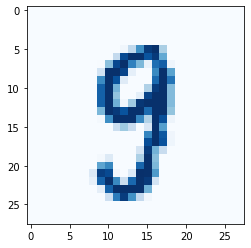

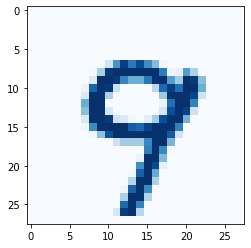

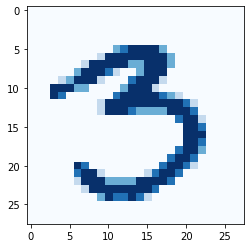

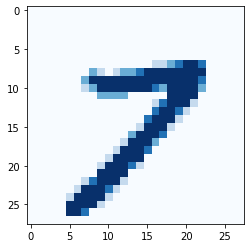

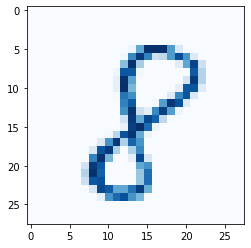

In [88]:
#visulizing any 5 training images randomly
for i in range(5):
    t= int(np.random.random()*63)
    plt.imshow(images[t].numpy().squeeze(),cmap='Blues')
    plt.show()

In [89]:
#Defining the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.cnn_layers = nn.Sequential(
            #Defining a 2D convolution layer
            nn.Conv2d(1,4,kernel_size=3,stride =1, padding = 1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            
            #Defining another 2D convolution layer
            nn.Conv2d(4,4,kernel_size=3,stride =1,padding =1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride =2),
        )
        
        self.linear_layers=nn.Sequential(
        nn.Linear(4*7*7,10)
        )
    
    #Defining the forward pass
    def forward(self,x):
        x= self.cnn_layers(x)
        x= x.view(x.size(0),-1)
        x= self.linear_layers(x)
        return x
    

In [90]:
#defining the model
model= Net()

#defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

#defining the loss function
criterion = nn.CrossEntropyLoss()

#checking fot GPU
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

#printing model
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [91]:
for i in range(10):
    running = 0
    for images,labels in trainloader:
        
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
            
        #Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output,labels)
        #back propogation
        loss.backward()
        #weights optimization
        optimizer.step()
        
        running = running + loss.item()
    else:
        print("Epoch{} - Training loss: {}" .format(i+1,running/len(trainloader)))
        

Epoch1 - Training loss: 0.16635937049691038
Epoch2 - Training loss: 0.08949709555872881
Epoch3 - Training loss: 0.07882599208924944
Epoch4 - Training loss: 0.073464097446208
Epoch5 - Training loss: 0.06922757648912542
Epoch6 - Training loss: 0.06675640456596894
Epoch7 - Training loss: 0.06418329144248179
Epoch8 - Training loss: 0.062231672169175994
Epoch9 - Training loss: 0.06227626761437447
Epoch10 - Training loss: 0.05931757216248463


In [92]:
#getting predictions on test set and measuring the performance
correct_count, all_count=0,0
for images, labels in testloader:
    for i in range(len(labels)):
        if torch.cuda.is_available():
            images = images.cuda()
            labels= labels.cuda()
        img = images[i].view(1,1,28,28)
        with torch.no_grad():
            logpss = model(img)
            
            
        ps = torch.exp(logpss)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        if(true_label==pred_label):
            correct_count= correct_count+1
            all_count+=1
            
print("Number of Images Tested=", all_count)
print("\nModel Accuracy=", (correct_count/all_count))

Number of Images Tested= 9374

Model Accuracy= 1.0
